In [3]:
import pandas as pd
from pandas import DataFrame
import sodapy as sd
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
import pandas_bokeh as pbk
pbk.output_notebook()
import geopandas
import seaborn as sns

Loading BokehJS ...

In [4]:
import pandas as pd
from pandas import DataFrame
import sodapy as sd
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
import pandas_bokeh as pbk
pbk.output_notebook()
import geopandas
import seaborn as sns

from bokeh.models import ColorBar, LogColorMapper
from bokeh.plotting import figure, output_file, show

def normal2d(X, Y, sigx=1.0, sigy=1.0, mux=0.0, muy=0.0):
    z = (X-mux)**2 / sigx**2 + (Y-muy)**2 / sigy**2
    return np.exp(-z/2) / (2 * np.pi * sigx * sigy)

X, Y = np.mgrid[-3:3:100j, -2:2:100j]
Z = normal2d(X, Y, 0.1, 0.2, 1.0, 1.0) + 0.1*normal2d(X, Y, 1.0, 1.0)
image = Z * 1e6

color_mapper = LogColorMapper(palette="Viridis256", low=1, high=1e7)

plot = figure(x_range=(0,1), y_range=(0,1), toolbar_location=None)
plot.image(image=[image], color_mapper=color_mapper,
           dh=[1.0], dw=[1.0], x=[0], y=[0])

color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12)

plot.add_layout(color_bar, 'right')

show(plot)

Loading BokehJS ...

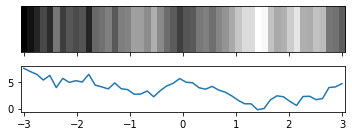

In [5]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)
plt.rcParams["figure.figsize"] = 5,2

x = np.linspace(-3,3)
y = np.cumsum(np.random.randn(50))+6

fig, (ax,ax2) = plt.subplots(nrows=2, sharex=True)

extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
ax.imshow(y[np.newaxis,:], cmap="binary", aspect="auto", extent=extent)
ax.set_yticks([])
ax.set_xlim(extent[0], extent[1])

ax2.plot(x,y)

plt.tight_layout()
plt.show()

In [35]:
from sodapy import Socrata

client = Socrata("analisi.transparenciacatalunya.cat", None)

results = client.get("rmgc-ncpb", limit=16774)

# Convert to pandas DataFrame
df = pd.DataFrame.from_records(results)

In [36]:
# Ara agruparem per intervals de pk de carreteres
# Fem un subdataset dels morts que n'hi ha en els accidents mortals que han ocorregut només en l'AP-7
dist_morts_via=df[['via','pk','nomcom','f_morts']]

#dist_morts_via=dist_morts_via.drop(index=dist_morts_via[dist_morts_via['f_morts']== '0'].index)
dist_morts_via.set_index('via', inplace=True)
dist_morts_ap=dist_morts_via.loc[['AP-7']]
dist_morts_ap["pk"]=dist_morts_ap["pk"].astype(int)

In [37]:
# Saber màxim pk
pks=dist_morts_ap[["pk"]]
max_val=pks.max()
max_val

pk    3427
dtype: int32

In [38]:
# Ordenem per punt km
dist_morts_ap=dist_morts_ap.sort_values('pk')
dist_morts_ap.head()

,pk,nomcom,f_morts
via,,,
AP-7,0,Alt Emporda,1
AP-7,6,Alt Emporda,2
AP-7,7,Alt Emporda,0
AP-7,7,Alt Emporda,1
AP-7,7,Alt Emporda,0


In [39]:
# La taula anterior demostra que els punts km estan malament assignats, però anem a intentar tirar amb lo q
# tenim per veure si podem agrupar 
dist=dist_morts_ap.groupby(pd.cut(dist_morts_ap["pk"], np.arange(0, 3427+34.27, 34.27))).size()
dist=dist.to_frame()
dist2=dist.reset_index()
dist2=dist2.rename(columns={"pk": "Intervals pk", 0: "#accidents"}) # canviar els noms correctes
dist2['percentcarretera'] = dist2.index+1
pd.options.display.float_format = "{:,.2f}".format
dist2

,Intervals pk,#accidents,percentcarretera
0,"(0.0, 34.27]",8,1
1,"(34.27, 68.54]",12,2
2,"(68.54, 102.81]",8,3
3,"(102.81, 137.08]",10,4
4,"(137.08, 171.35]",29,5
...,...,...,...
95,"(3255.65, 3289.92]",0,96
96,"(3289.92, 3324.19]",2,97
97,"(3324.19, 3358.46]",2,98
98,"(3358.46, 3392.73]",2,99


<ipython-input-41-16c5d90c7f7b>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ax.imshow(y[np.newaxis,:], cmap="Greys", aspect="auto",extent=extent)


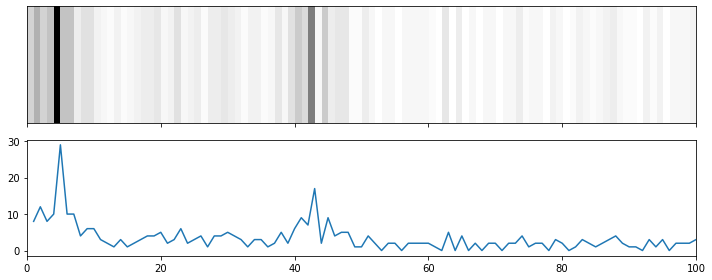

In [41]:
plt.rcParams["figure.figsize"] = 10,4

x = dist2["percentcarretera"]
y = dist2["#accidents"]

fig, (ax,ax2) = plt.subplots(nrows=2, sharex=True)

extent = [0,100,0,1]
ax.imshow(y[np.newaxis,:], cmap="Greys", aspect="auto",extent=extent)
ax.set_yticks([])

ax2.plot(x,y)

plt.tight_layout()
plt.show()

In [12]:
dist_morts_via=df[['via','pk','nomcom','f_morts']]

#dist_morts_via=dist_morts_via.drop(index=dist_morts_via[dist_morts_via['f_morts']== '0'].index)
dist_morts_via.set_index('via', inplace=True)
dist_morts_n=dist_morts_via.loc[['N-II']]
dist_morts_n["pk"]=dist_morts_n["pk"].astype(int)
dist_morts_n

,pk,nomcom,f_morts
via,,,
N-II,7087,Girones,1
N-II,7194,Girones,0
N-II,6619,Maresme,1
N-II,7738,Alt Emporda,0
N-II,7605,Alt Emporda,1
...,...,...,...
N-II,6405,Maresme,0
N-II,7409,Alt Emporda,0
N-II,742,Alt Emporda,0


In [13]:
# Saber màxim pk
pks=dist_morts_n[["pk"]]
max_val=pks.max()
max_val

pk    7798
dtype: int32

In [14]:
# Ordenem per punt km
dist_morts_n=dist_morts_n.sort_values('pk')
dist=dist_morts_n.groupby(pd.cut(dist_morts_n["pk"], np.arange(0, 7798+77.98, 77.98))).size()
dist=dist.to_frame()
dist2=dist.reset_index()
dist2=dist2.rename(columns={"pk": "Intervals pk", 0: "#accidents"}) # canviar els noms correctes
dist2['percentcarretera'] = dist2.index+1
pd.options.display.float_format = "{:,.2f}".format
dist2

,Intervals pk,#accidents,percentcarretera
0,"(0.0, 77.98]",0,1
1,"(77.98, 155.96]",0,2
2,"(155.96, 233.94]",0,3
3,"(233.94, 311.92]",0,4
4,"(311.92, 389.9]",0,5
...,...,...,...
95,"(7408.1, 7486.08]",17,96
96,"(7486.08, 7564.06]",8,97
97,"(7564.06, 7642.04]",8,98
98,"(7642.04, 7720.02]",12,99


<ipython-input-15-16c5d90c7f7b>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ax.imshow(y[np.newaxis,:], cmap="Greys", aspect="auto",extent=extent)


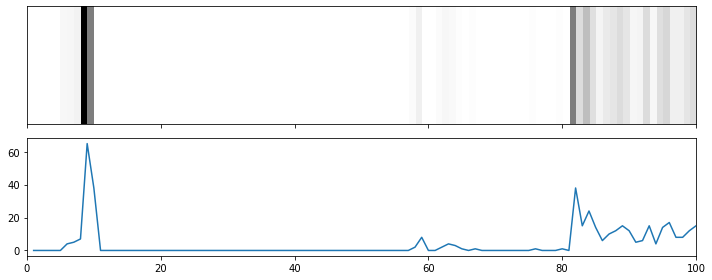

In [15]:
plt.rcParams["figure.figsize"] = 10,4

x = dist2["percentcarretera"]
y = dist2["#accidents"]

fig, (ax,ax2) = plt.subplots(nrows=2, sharex=True)

extent = [0,100,0,1]
ax.imshow(y[np.newaxis,:], cmap="Greys", aspect="auto",extent=extent)
ax.set_yticks([])

ax2.plot(x,y)

plt.tight_layout()
plt.show()

In [16]:
dist_morts_via=df[['via','pk','nomcom','f_morts']]

#dist_morts_via=dist_morts_via.drop(index=dist_morts_via[dist_morts_via['f_morts']== '0'].index)
dist_morts_via.set_index('via', inplace=True)
dist_morts_c=dist_morts_via.loc[['C-31']]
dist_morts_c["pk"]=dist_morts_c["pk"].astype(int)
dist_morts_c

,pk,nomcom,f_morts
via,,,
C-31,350,Baix Emporda,0
C-31,1374,Baix Penedes,0
C-31,1659,Garraf,0
C-31,1462,Garraf,0
C-31,1675,Garraf,0
...,...,...,...
C-31,3666,Alt Emporda,1
C-31,1368,Baix Penedes,1
C-31,1469,Garraf,0


In [18]:
# Saber màxim pk
pks=dist_morts_c[["pk"]]
max_val=pks.max()
max_val

pk    3802
dtype: int32

In [22]:
# Ordenem per punt km
dist_morts_c=dist_morts_c.sort_values('pk')
dist=dist_morts_c.groupby(pd.cut(dist_morts_c["pk"], np.arange(0, 3802+38.02, 38.02))).size()
dist=dist.to_frame()
dist2=dist.reset_index()
dist2=dist2.rename(columns={"pk": "Intervals pk", 0: "#accidents"}) # canviar els noms correctes
dist2['percentcarretera'] = dist2.index+1
pd.options.display.float_format = "{:,.2f}".format
dist2.head(20)

,Intervals pk,#accidents,percentcarretera
0,"(0.0, 38.02]",0,1
1,"(38.02, 76.04]",0,2
2,"(76.04, 114.06]",0,3
3,"(114.06, 152.08]",7,4
4,"(152.08, 190.1]",24,5
5,"(190.1, 228.12]",26,6
6,"(228.12, 266.14]",0,7
7,"(266.14, 304.16]",0,8
8,"(304.16, 342.18]",16,9
9,"(342.18, 380.2]",8,10


<ipython-input-21-16c5d90c7f7b>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ax.imshow(y[np.newaxis,:], cmap="Greys", aspect="auto",extent=extent)


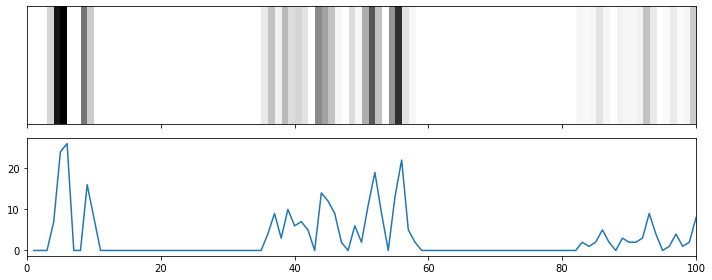

In [21]:
plt.rcParams["figure.figsize"] = 10,4

x = dist2["percentcarretera"]
y = dist2["#accidents"]

fig, (ax,ax2) = plt.subplots(nrows=2, sharex=True)

extent = [0,100,0,1]
ax.imshow(y[np.newaxis,:], cmap="Greys", aspect="auto",extent=extent)
ax.set_yticks([])

ax2.plot(x,y)

plt.tight_layout()
plt.show()

In [23]:
dist_morts_via=df[['via','pk','nomcom','f_morts']]

#dist_morts_via=dist_morts_via.drop(index=dist_morts_via[dist_morts_via['f_morts']== '0'].index)
dist_morts_via.set_index('via', inplace=True)
dist_morts_nn=dist_morts_via.loc[['N-340']]
dist_morts_nn["pk"]=dist_morts_nn["pk"].astype(int)
dist_morts_nn

,pk,nomcom,f_morts
via,,,
N-340,10984,Baix Ebre,0
N-340,10778,Montsia,1
N-340,11048,Baix Ebre,1
N-340,1121,Baix Camp,1
N-340,11066,Baix Ebre,2
...,...,...,...
N-340,11355,Baix Camp,0
N-340,10865,Baix Ebre,0
N-340,11717,Tarragones,1


In [24]:
# Saber màxim pk
pks=dist_morts_nn[["pk"]]
max_val=pks.max()
max_val

pk    12437
dtype: int32

In [28]:
# Ordenem per punt km
dist_morts_nn=dist_morts_nn.sort_values('pk')
dist=dist_morts_nn.groupby(pd.cut(dist_morts_nn["pk"], np.arange(0, 12437+12.437, 12.437))).size()
dist=dist.to_frame()
dist2=dist.reset_index()
dist2=dist2.rename(columns={"pk": "Intervals pk", 0: "#accidents"}) # canviar els noms correctes
dist2['percentcarretera'] = dist2.index+1
pd.options.display.float_format = "{:,.2f}".format
dist2.head(50)

,Intervals pk,#accidents,percentcarretera
0,"(0.0, 12.437]",0,1
1,"(12.437, 24.874]",0,2
2,"(24.874, 37.311]",0,3
3,"(37.311, 49.748]",0,4
4,"(49.748, 62.185]",0,5
5,"(62.185, 74.622]",0,6
6,"(74.622, 87.059]",0,7
7,"(87.059, 99.496]",0,8
8,"(99.496, 111.933]",0,9
9,"(111.933, 124.37]",0,10


<ipython-input-29-16c5d90c7f7b>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ax.imshow(y[np.newaxis,:], cmap="Greys", aspect="auto",extent=extent)


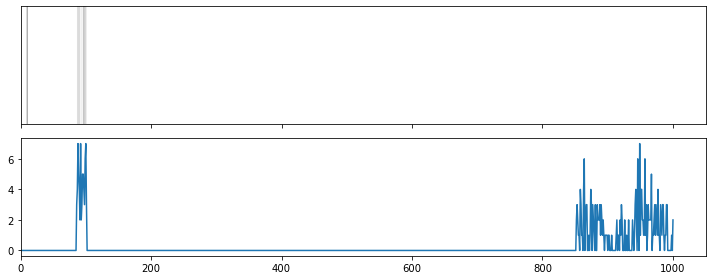

In [29]:
plt.rcParams["figure.figsize"] = 10,4

x = dist2["percentcarretera"]
y = dist2["#accidents"]

fig, (ax,ax2) = plt.subplots(nrows=2, sharex=True)

extent = [0,100,0,1]
ax.imshow(y[np.newaxis,:], cmap="Greys", aspect="auto",extent=extent)
ax.set_yticks([])

ax2.plot(x,y)

plt.tight_layout()
plt.show()

In [ ]:
# En la figura anterior veiem com tots els pks on hi ha accidents estan concentrats en l'interval 1013->1247
# Podem recolocar els extrems de la carretera a les vores d'aquest interval (fer zoom in) i repetir el proces

